## **DATA ANALYSIS - BLINKIT ANALYSIS**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

### **Import Raw Data**

In [2]:
df = pd.read_csv("/home/ashwin/Desktop/Projects/Blinkit-Sales-Analysis/blinkit_data_raw.csv")

### **Sample Data**

In [40]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Cluster
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,2
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,1
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,1
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,2


In [41]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Cluster
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.857645,164.5526,4.0,0
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,12.857645,241.6828,4.0,0
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,12.857645,86.6198,4.0,1
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,12.857645,97.8752,4.0,1
8522,Regular,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.857645,112.2544,4.0,1


### **Size of Data**

In [5]:
print("Size of data:", df.shape)

Size of data: (8523, 12)


### **Field Info**

### **Data Types**

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Overview**

In [8]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())
df.describe(include='all')

Shape of dataset: (8523, 12)

Columns:
 Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Missing values:
 Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
count,8523,8523,8523,8523.000000,8523,8523,8523,8523,8523.000000,7060.000000,8523.000000,8523.000000
unique,5,1559,16,NaN,10,3,3,4,NaN,NaN,NaN,NaN
top,Low Fat,FDW13,Fruits and Vegetables,NaN,OUT027,Tier 3,Medium,Supermarket Type1,NaN,NaN,NaN,NaN
freq,5089,10,1232,NaN,935,3350,3631,5577,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2010.831867,NaN,NaN,NaN,NaN,0.066132,12.857645,140.992782,3.965857
std,NaN,NaN,NaN,8.371760,NaN,NaN,NaN,NaN,0.051598,4.643456,62.275067,0.605651
min,NaN,NaN,NaN,1998.000000,NaN,NaN,NaN,NaN,0.000000,4.555000,31.290000,1.000000
25%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,0.026989,8.773750,93.826500,4.000000
50%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,0.053931,12.600000,143.012800,4.000000
75%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,0.094585,16.850000,185.643700,4.200000


### **Data Cleaning**

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())
df['Sales'] = df['Sales'].fillna(df['Sales'].median())

df = df.drop_duplicates()


In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [12]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Data Enrichment Features**

### **Business Requirements**

#### **KPI's Requirements**

In [13]:
#Total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#Number of Items sold
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Format Currency

from babel.numbers import format_currency

usd_to_inr = 83.5

total_sales_inr = total_sales * usd_to_inr
avg_sales_inr = avg_sales * usd_to_inr

#Display

print("Total Sales:", format_currency(total_sales_inr, "INR", locale="en_IN"))
print("Average Sales:", format_currency(avg_sales_inr, "INR", locale="en_IN"))
print(f"No of Items Sold: {no_of_items_sold:,}")
print(f"Average Ratings: {avg_ratings:,.1f}")


Total Sales: ₹10,03,40,403.65
Average Sales: ₹11,772.90
No of Items Sold: 8,523
Average Ratings: 4.0


#### **Outlet Size**

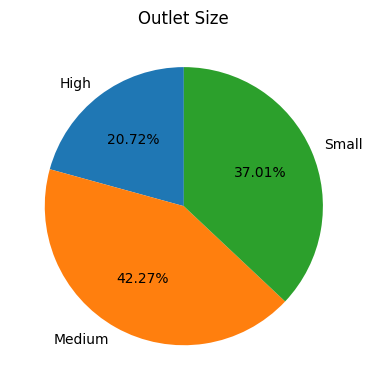

In [14]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize = (4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

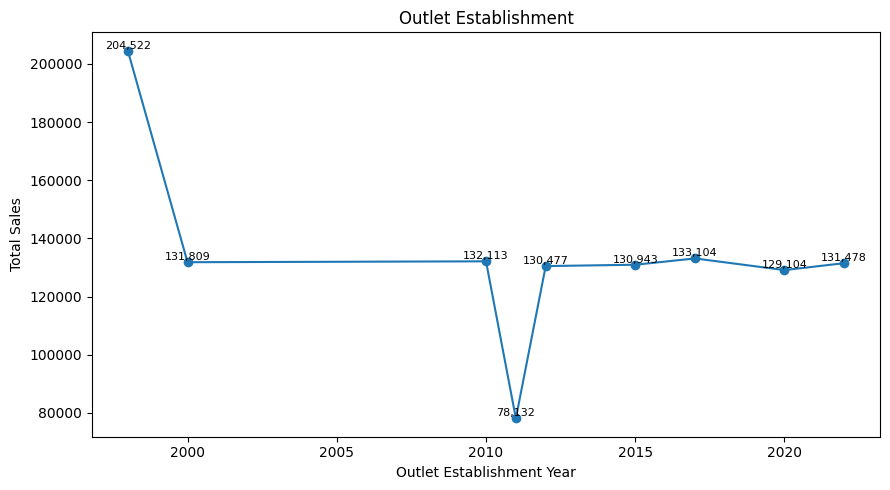

In [15]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha = 'center', va = 'bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### **Sales by Outlet Type**

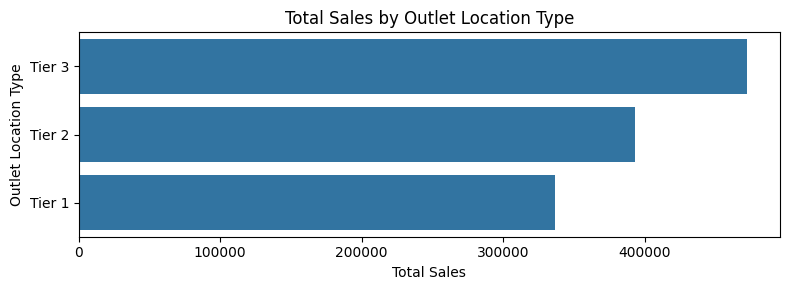

In [16]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))  # Smaller height, wide enough for labels
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()
plt.show()

#### **Distribution of Sales**

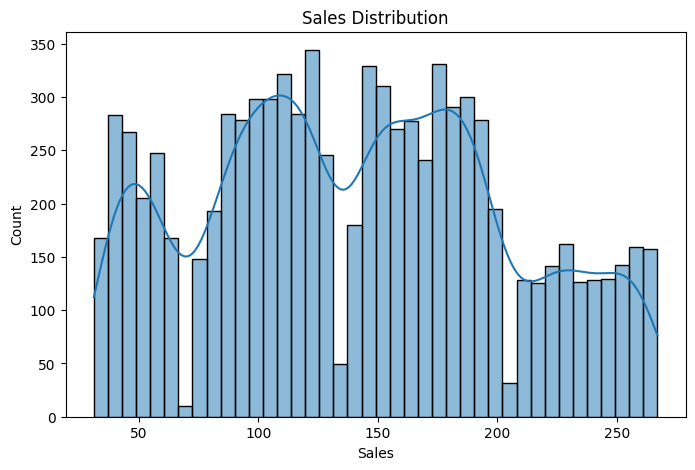

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=40, kde=True)
plt.title("Sales Distribution")
plt.show()

### **Sales Analysis**

#### **Total Sales by Item Type**

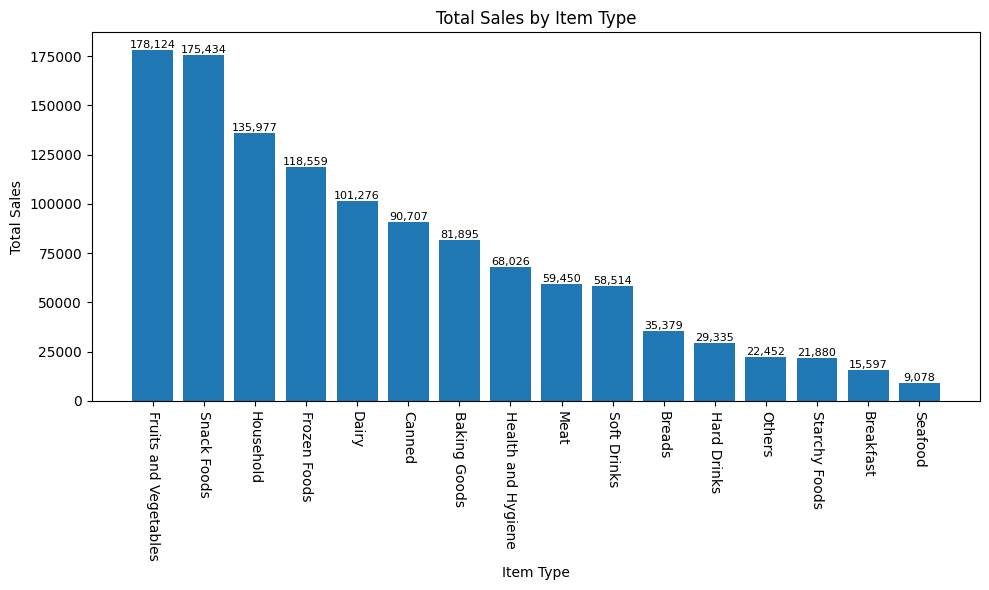

In [18]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

#### **Sales by Outlet Location and Fat Content**

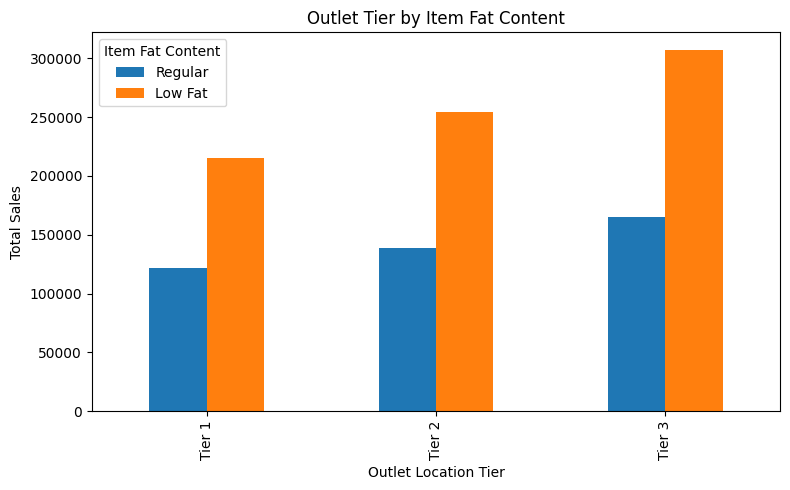

In [19]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### **Sales by Fat Content**

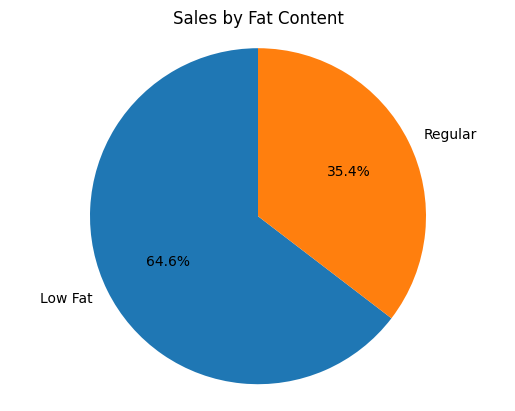

In [20]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
                      autopct = '%.1f%%' ,
                      startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### **Top Selling Product Types**

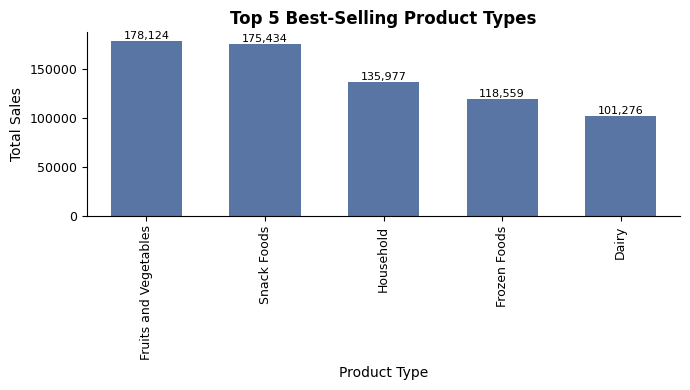

In [21]:
top_products = df.groupby('Item Type')['Sales'].sum().reset_index()
top_products = top_products.sort_values('Sales', ascending=False).head(5)

plt.figure(figsize=(7, 4))
ax = sns.barplot(x='Item Type', y='Sales', data=top_products, color='#4C72B0', width=0.6)

plt.title('Top 5 Best-Selling Product Types', fontsize=12, fontweight='bold')
plt.xlabel('Product Type', fontsize=10)
plt.ylabel('Total Sales', fontsize=10)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height,
            f'{height:,.0f}',
            ha='center', va='bottom', fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

### **Correlation Heatmap**

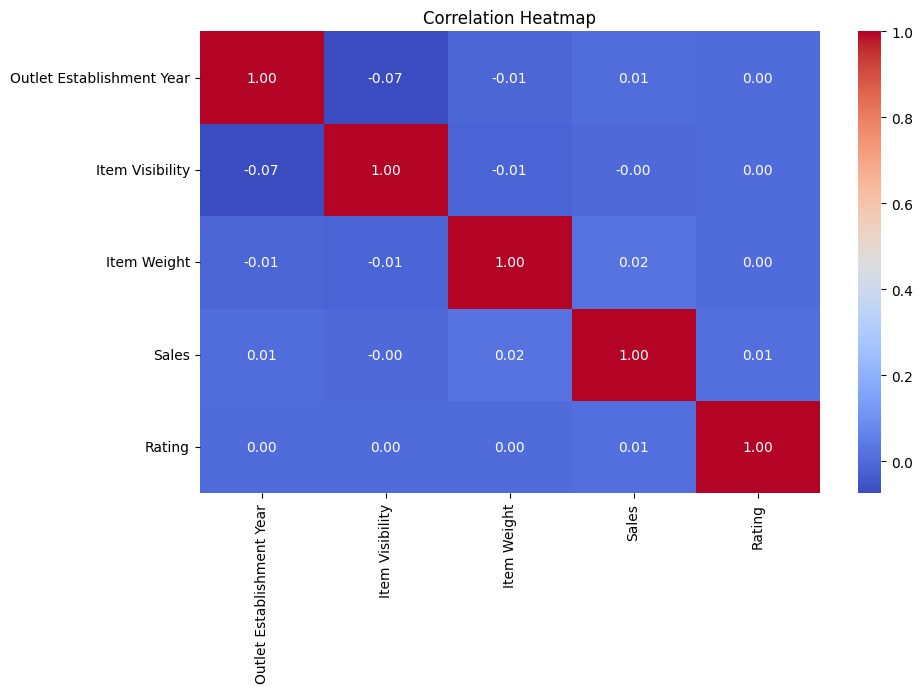

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### **Clustering (KMeans)**

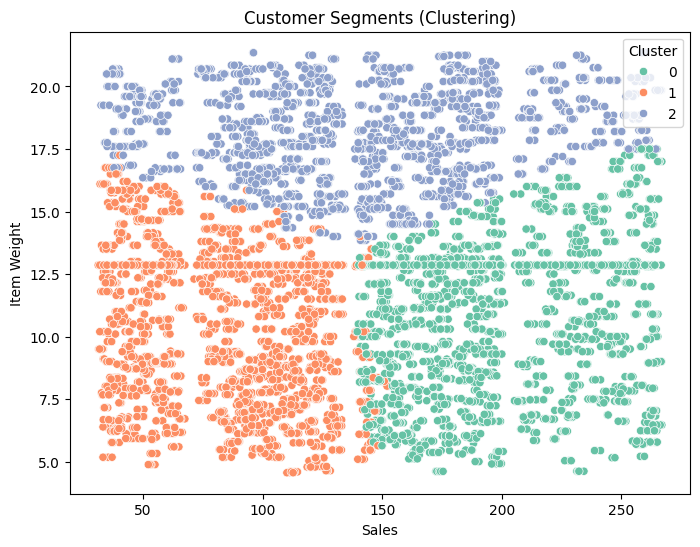

In [23]:
X_clust = df[['Sales','Item Visibility','Item Weight','Rating']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x="Sales", y="Item Weight", hue="Cluster", data=df, palette="Set2")
plt.title("Customer Segments (Clustering)")
plt.show()

#Cluster0 - Green  - Higher Revenue Products
#Cluster1 - Orange - Mid performing Products
#Cluster2 - Blue   - Niche Products

### **Predictive Modeling of Data**

In [24]:
# 1. Define X and y first (before encoding)
X = df.drop(columns=['Sales','Item Identifier'])
y = df['Sales']

# 2. Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# 3. One-hot encode categorical columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### **Linear Regression**

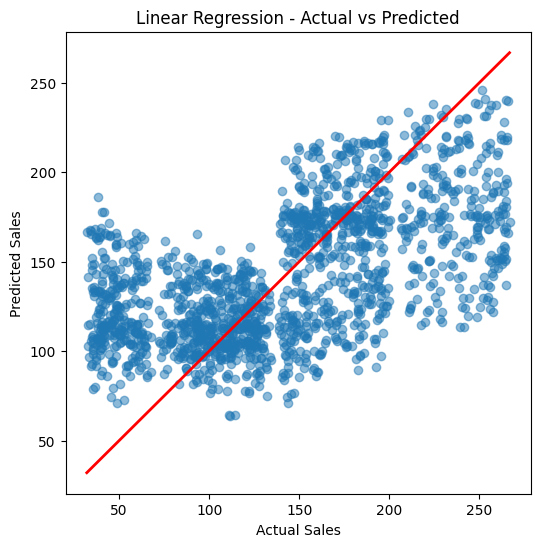

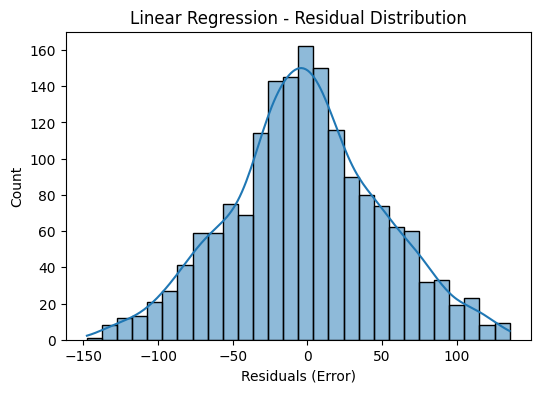

Linear Regression R2: 0.3463902841951829
Linear Regression RMSE: 50.884309151772804


In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.show()

residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(6,4))
sns.histplot(residuals_lr, kde=True)
plt.xlabel("Residuals (Error)")
plt.title("Linear Regression - Residual Distribution")
plt.show()

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

#### **Random Forest Regressor**

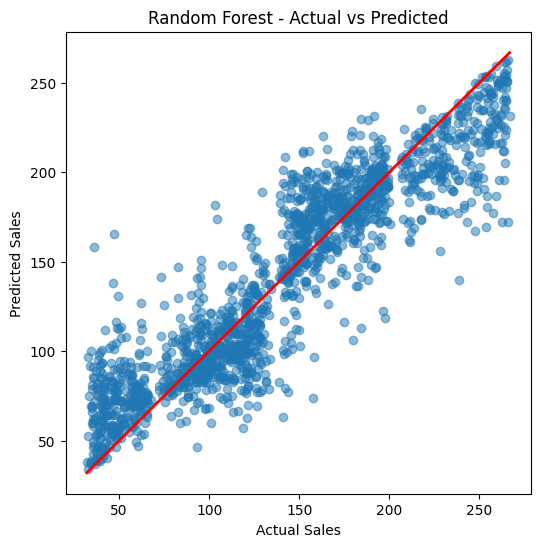

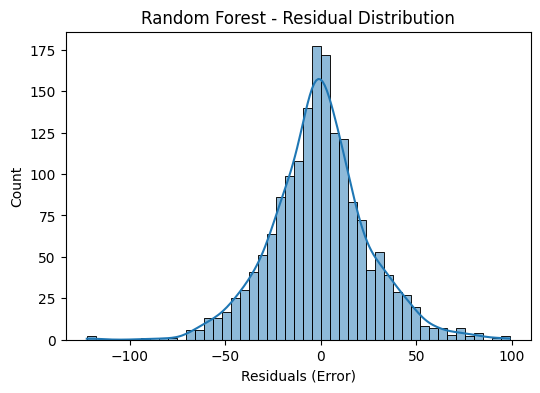


Random Forest R2: 0.8376687165292948
Random Forest RMSE: 25.358627490497508


In [26]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.show()

residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6,4))
sns.histplot(residuals_rf, kde=True)
plt.xlabel("Residuals (Error)")
plt.title("Random Forest - Residual Distribution")
plt.show()

print("\nRandom Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

#### **Gradient Boosting Regressor**

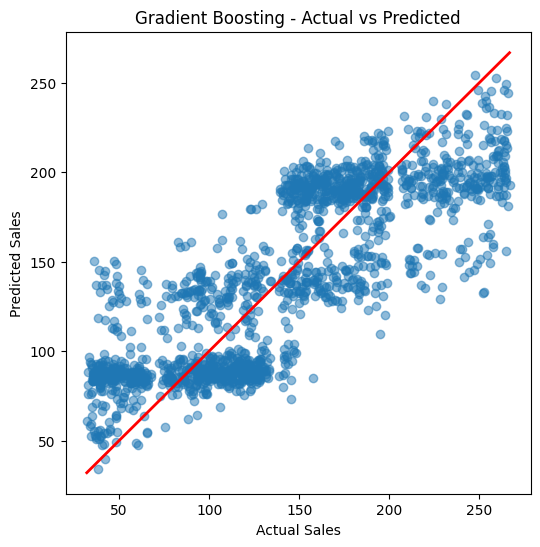

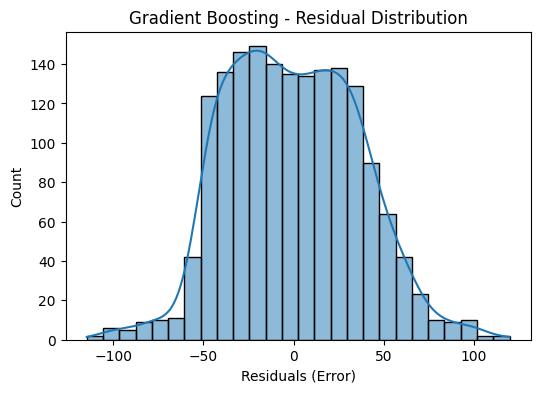


Gradient Boosting R2: 0.6679693848590682
Gradient Boosting RMSE: 36.26717249459088


In [27]:
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Gradient Boosting - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.show()

residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(6,4))
sns.histplot(residuals_gb, kde=True)
plt.xlabel("Residuals (Error)")
plt.title("Gradient Boosting - Residual Distribution")
plt.show()

print("\nGradient Boosting R2:", r2_score(y_test, y_pred_gb))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

#### **Model Comparision Inference**

In [33]:
# Collect model results
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Create results DataFrame
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "R2 Score": [r2_lr, r2_rf, r2_gb],
    "RMSE": [rmse_lr, rmse_rf, rmse_gb]
}

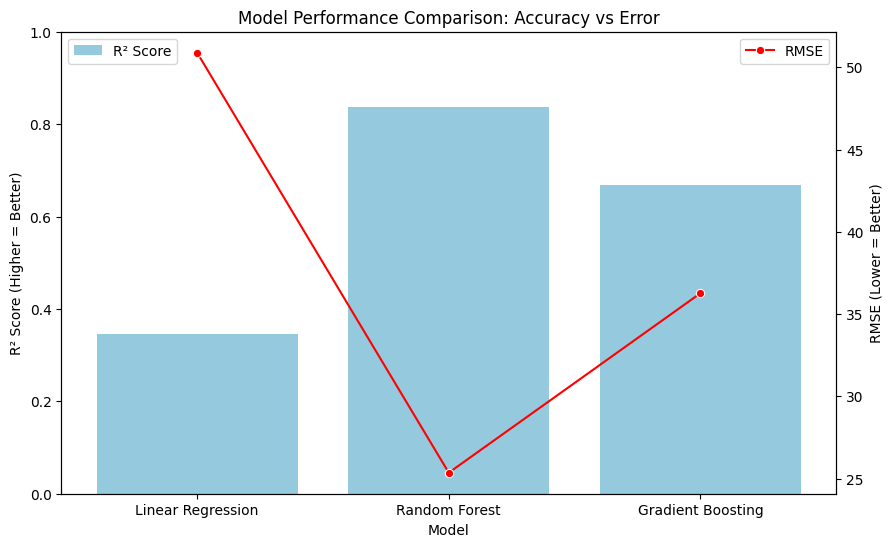

Model Comparison Inference:

- Linear Regression → Weak performance (low R², poor RMSE). Not suitable for complex sales patterns.
- Random Forest → Best performer with highest R² and best RMSE → most reliable for prediction.
- Gradient Boosting → Better than Linear Regression but less stable than Random Forest in this dataset.


In [39]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot R² (left axis)
sns.barplot(x="Model", y="R2 Score", data=results_df, ax=ax1, color="skyblue", label="R² Score")
ax1.set_ylabel("R² Score (Higher = Better)")
ax1.set_ylim(0, 1)

# Create second axis for RMSE
ax2 = ax1.twinx()
sns.lineplot(x="Model", y="RMSE", data=results_df, ax=ax2, color="red", marker="o", label="RMSE")
ax2.set_ylabel("RMSE (Lower = Better)")

# Titles and legends
plt.title("Model Performance Comparison: Accuracy vs Error")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

# ANSI escape codes for styling
bold = "\033[1m"
reset = "\033[0m"
red = "\033[91m"
green = "\033[92m"
yellow = "\033[93m"

print(f"{bold}Model Comparison Inference:{reset}\n")
print(f"- {red}Linear Regression{reset} → Weak performance (low R², poor RMSE). Not suitable for complex sales patterns.")
print(f"- {green}Random Forest{reset} → Best performer with highest R² and best RMSE → most reliable for prediction.")
print(f"- {yellow}Gradient Boosting{reset} → Better than Linear Regression but less stable than Random Forest in this dataset.")
